In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The Normal Distribution
The normal distribution is the only continuous distribution that we will study, but there are many more.  The normal distributon is by far the most important, especially for us as we learn parametric statistics.   

Take a look at [the scipy stats normal probability distribution function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).  In probability theory, a normal (or Gaussian) distribution is a type of continuous probability distribution for a real-valued random variable. The general form of its probability density function is: 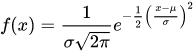.  

The parameter $\mu$ is the mean or expectation of the distribution (and also its median and mode), while the parameter $\sigma$  is its standard deviation. The variance of the distribution is $\sigma ^{2}$. A random variable with a Gaussian distribution is said to be normally distributed, ~N($\mu$,$\sigma ^{2}$)

Let's start the same as for the discrete probability distributions that we looked at, by creating some simulated data that has a normal distribution and plotting it. 

In [4]:
from scipy.stats import norm

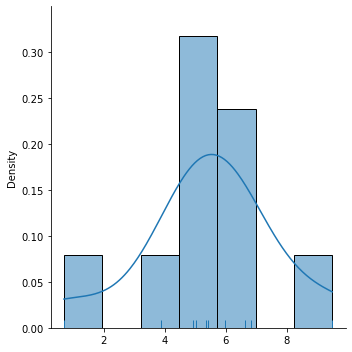

In [5]:
# simulate 10 random variables with normal distribution, mean=6, std=2
# for now let's all work with a constant random state to keep things together
normal_rvs1=norm.rvs(6,2,size=10,random_state=11)
ax=sns.displot(normal_rvs1,kde=True,stat='density',rug=True)

In [6]:
# let's look at the values
print(normal_rvs1)

[9.49890948 5.42785401 5.03086974 0.69336288 5.98343074 5.36073727
 4.92674128 6.63080534 6.84210143 3.86879404]


Let's standardize these values using the standardization:  z=(X-$\mu$)/$\sigma$.  Once you standardize these values, you can utilize the standard normal distribution.

In [7]:
stnorm1=(normal_rvs1-6)/2
print(stnorm1)

[ 1.74945474 -0.286073   -0.48456513 -2.65331856 -0.00828463 -0.31963136
 -0.53662936  0.31540267  0.42105072 -1.06560298]


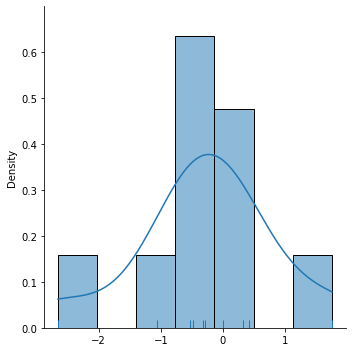

In [8]:
# You could also generate these same 10 data points from the normal dsitribution, with a mean=1 and std=0 (the standard noraml distribution)
# we are keeping the random_state constant to keep the same values
# frequency for frequency plot, density for denisty plot (toal area of bars =1), probability for total heghts =1; kde = use kernal densty estimation for plotting distribution
# rug for tick-marks for individual observations, bins=, binwidth=
normal_rvs=norm.rvs(0,1,size=10,random_state=11)
# plot with the kernal density estimate to estiamte the probability distribution
ax=sns.displot(normal_rvs,kde=True,stat='density',rug=True)

In [9]:
# the 10 standard normal random variables generated
print(normal_rvs)

[ 1.74945474 -0.286073   -0.48456513 -2.65331856 -0.00828463 -0.31963136
 -0.53662936  0.31540267  0.42105072 -1.06560298]


This gives us a list of 10 continuous random variables that have a standard normal distribution.  If we show that the standard normal distribution pdf is defined as:    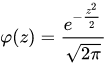, then we can calculate directly from this function to find the probability density.

In [10]:
xB=np.array([ 1.74945474, -0.286073 ,  -0.48456513 ,-2.65331856, -0.00828463, -0.31963136,  -0.53662936,  0.31540267 , 0.42105072 ,-1.06560298])
pdf_normalB=((1/(np.sqrt((2*np.pi)))) * (np.power(np.e,-(np.power((xB),2)/2))))

In [11]:
print(pdf_normalB)

[0.08635967 0.38294749 0.35475062 0.01180788 0.39892859 0.37907522
 0.34544423 0.37958453 0.36510132 0.22611911]


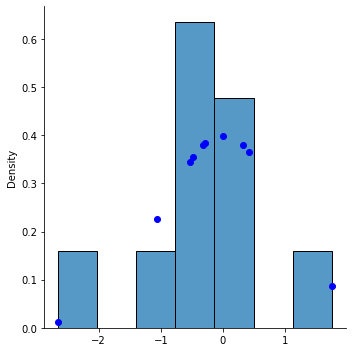

In [12]:
# We can plot these to show the same probability distributon, using the pdf values from the pdf formula
sns.displot(xB,stat='density')
plt.plot(xB,pdf_normalB,'bo')

In [13]:
# the pdf vales of these 10 variables usng the theoretical pdf function from stats.norm gives thses values
normal_pdfA=norm.pdf(normal_rvs)
print(normal_pdfA)

[0.08635967 0.38294749 0.35475062 0.01180788 0.39892859 0.37907521
 0.34544423 0.37958453 0.36510132 0.22611911]


We can take any range of random continuous variables and pass them to this standard normal distribution pdf formula, with mean=0 and std=1, to get a corresponding y value that is the pdf value with a standard normal distribution.  We can then plot it to see the standard normal distribution.

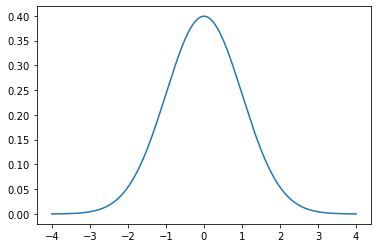

In [14]:
xC=np.linspace(-4,4,10000)
pdf_normalC=((1/(np.sqrt((2*np.pi)))) * (np.power(np.e,-(np.power((xC),2)/2))))
plt.plot(xC,pdf_normalC)

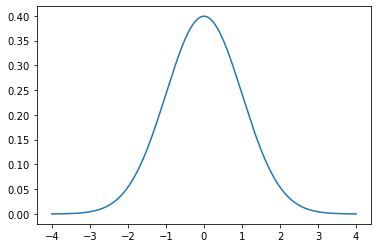

In [15]:
# Or plot from the theoretical pdf to do this for you
normal_A=norm.pdf(xC,loc=0,scale=1)
ax1=sns.lineplot(x=xC,y=normal_A)

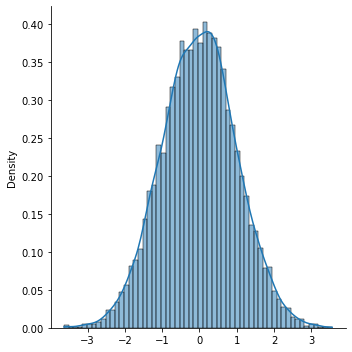

In [16]:
# Or just call the stats.norm rvs function that creates these values and the will plot them along with an estimated density
standard_normal_rvs=norm.rvs(0,1,size=10000)
ax=sns.displot(standard_normal_rvs,kde=True,stat='density')

# The area under the pdf (the normal curve) is the probability.  
This is the cumulative distribution function or  the CDF and is the integration of the PDF.  This defines the probabilty of the normal random variable taking a value less than or equal to x.  To use the standard normal distribution we will be using the CDF of the distribution to find the probability and not the PDF since continuous random variables have zero point probabilities. This is what is found in the standard normal tables. 

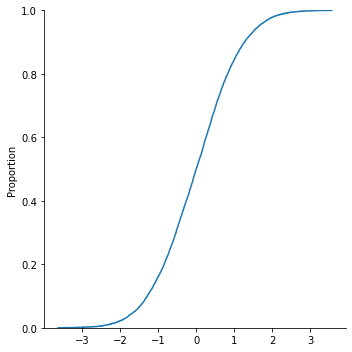

In [17]:
# Plot the CDF of this standard normal distribution
ax=sns.displot(standard_normal_rvs,kind='ecdf')

# The CDF is the area under the curve of the PDF and is the integral of the PDF.  This is the probability of x being equal or less than X.

In [18]:
import scipy.stats
from scipy.stats import norm

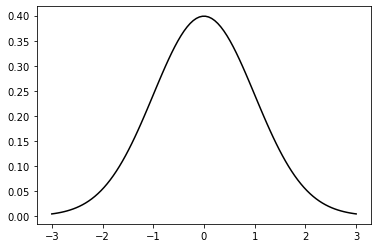

In [19]:
# Plot a Standard Normal Distribution

x_min = -3
x_max = 3

mean = 0
std = 1

x = np.linspace(x_min, x_max, 100)
#print(x)

y = norm.pdf(x,mean,std)

plt.plot(x,y, color='black')

In [20]:
from scipy.integrate import quad
# integration between x1 and x2

#this is finding the value of the pdf for a given range of random variables x
def normal_distribution_function(x):
    value = ((1/(np.sqrt((2*np.pi)))) * (np.power(np.e,-(np.power((x),2)/2))))
    #print(value)
    return value

x1 = mean + std
x2 = mean + 2.0 * std

res, err = quad(normal_distribution_function, x1, x2)
# the normal_distribution_function(x) is an array of the values found for the pdf
# integrate  between x1 and x2 (using the x values passed to it)

print('Normal Distribution (mean,std):',mean,std)
print('Integration bewteen {} and {} --> '.format(x1,x2),res)

Normal Distribution (mean,std): 0 1
Integration bewteen 1 and 2.0 -->  0.13590512198327787


Text(0, 0.5, 'Normal Distribution')

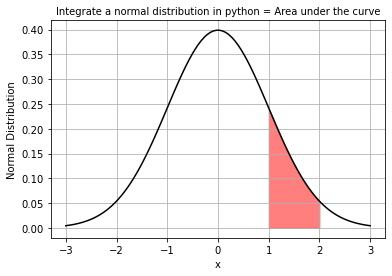

In [21]:
#plot integration surface
plt.plot(x,y, color='black')
ptx = np.linspace(x1, x2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='red', alpha=0.5)

plt.grid()
plt.title('Integrate a normal distribution in python = Area under the curve',fontsize=10)
plt.xlabel('x')
plt.ylabel('Normal Distribution')

We can check this integral using the **norm.cdf** call through scipy.  This will provide the area under the curve = the probability of finding a value less than or equal to the x value in the standard normal PDF. 

In [22]:
# check 
# You want the probability or the area under the curve between the z-values of -2 and 2
# subtract the area to the left of -2 from the area to the left of 2
print(norm.cdf(2,0,1))
print(norm.cdf(1,0,1))
print("cdf of (z=2) - cdf of (z=1) = " + str(norm.cdf(2) - norm.cdf(1)))

0.9772498680518208
0.8413447460685429
cdf of (z=2) - cdf of (z=1) = 0.13590512198327787
